In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical


In [144]:
dataset_train = pd.read_csv('Dataset/google_stock_price/Google_Stock_Price_Train.csv') # change the path
training_set = dataset_train.iloc[:, 1:2].values


In [145]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [146]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [147]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [148]:
num_classes = X_train.shape[1]
y_train = to_categorical(y_train, num_classes)

In [149]:
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
def build_model(x_train, y_train, optimizer, model):
    print("Optimizer: ", optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    return model, history

In [151]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
adam_model, adam_rnn_history = build_model(X_train, y_train, Adam(), model)
rmsprop_model, rmsprop_rnn_history = build_model(X_train, y_train, RMSprop(), model)
adagrad_model, adagrad_rnn_history = build_model(X_train, y_train, 
                                                     Adagrad(), model)
sgd_model, sgd_rnn_history = build_model(X_train, y_train, 
                                             SGD(), model)

Optimizer:  <keras.src.optimizers.adam.Adam object at 0x00000224E6669430>
Epoch 1/10


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2621 - loss: 4.0945
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8859 - loss: 4.0930
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9693 - loss: 4.0887
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9833 - loss: 4.0859
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9833 - loss: 4.0787
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9833 - loss: 4.0708
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9833 - loss: 4.0603
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9833 - loss: 4.0491
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9833 - loss: 4.0429
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9833 - loss: 4.0741
Optimizer:  <keras.src.optimizers.rmsprop.RMSprop object at 0x00000224FF580380>
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9833 - loss: 4.

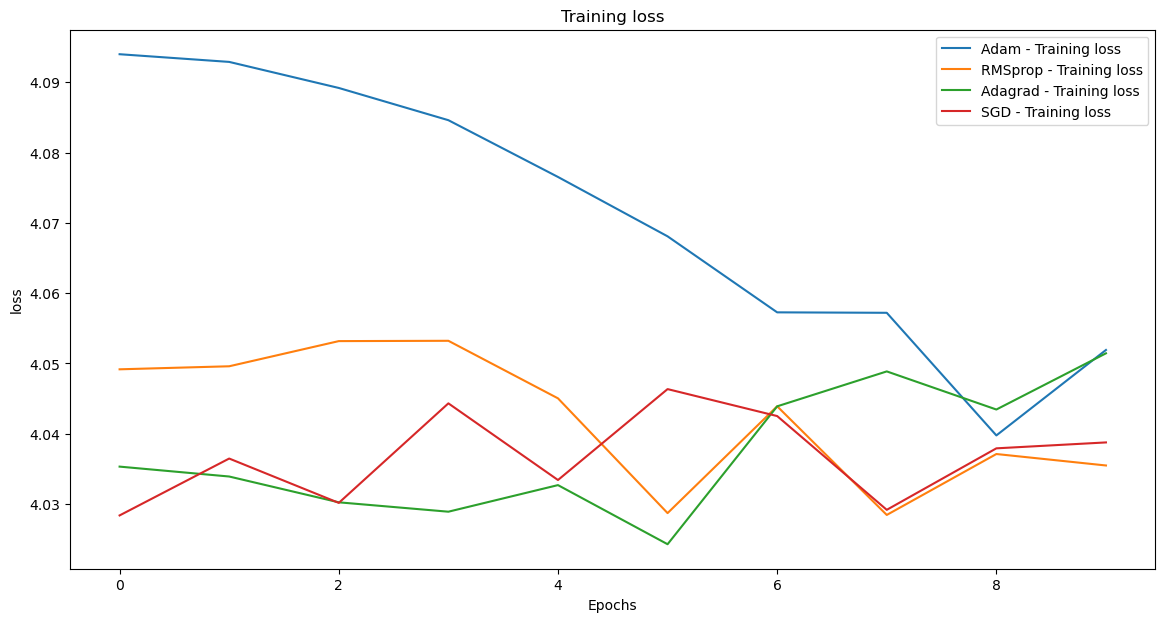

In [152]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


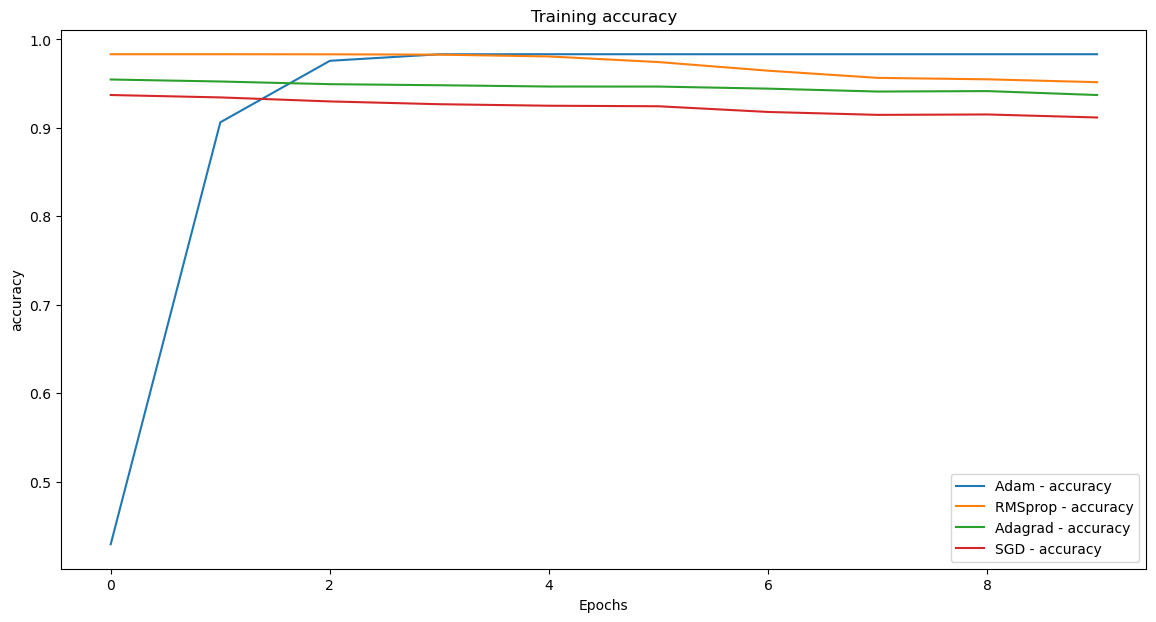

In [153]:
# Function to plot training loss
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])
